# Summing Population Raster within Polygons

In [1]:
import geopandas as gpd
from rasterstats import zonal_stats
from IPython.core.pylabtools import figsize

In [7]:
figsize(12,12)

## Polygons

Let's use NYC Neighborhoods as our example of irregularly shaped and sized administrative regions. 

Source: https://www1.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page

In [8]:
url = "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2020/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson"

In [9]:
neighborhoods = gpd.read_file(url)

In [10]:
neighborhoods['area_sq_miles'] = neighborhoods.to_crs(6933).area / 2.59e+6

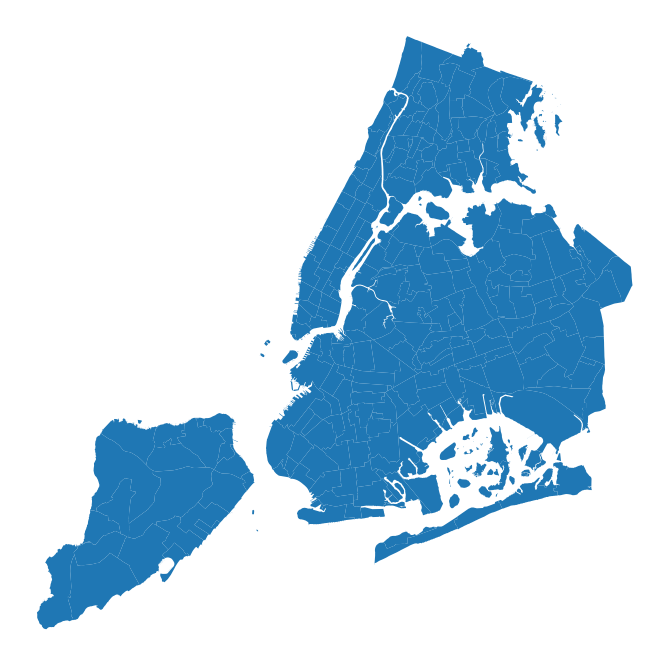

In [11]:
ax = neighborhoods.plot()
ax.axis('off');

## Raster Data: Gridded Population of the World

Calculate the total population within each neighborhood polygon, according to the GPW dataset.

Source: https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-count-rev11

In [12]:
url = "./data/gpw-v4-population-count-rev11_2020_30_sec_tif/gpw_v4_population_count_rev11_2020_30_sec.tif"

In [13]:
neighborhood_populations = zonal_stats(neighborhoods, url, stats='sum')

In [14]:
neighborhood_populations[:5]

[{'sum': 34000.62890625},
 {'sum': 38155.46875},
 {'sum': 41821.2734375},
 {'sum': 53001.16015625},
 {'sum': 16747.34375}]

In [15]:
neighborhoods['population'] = [i['sum'] for i in neighborhood_populations]

In [16]:
neighborhoods['population_per_sq_mile'] = neighborhoods['population'] / neighborhoods['area_sq_miles']

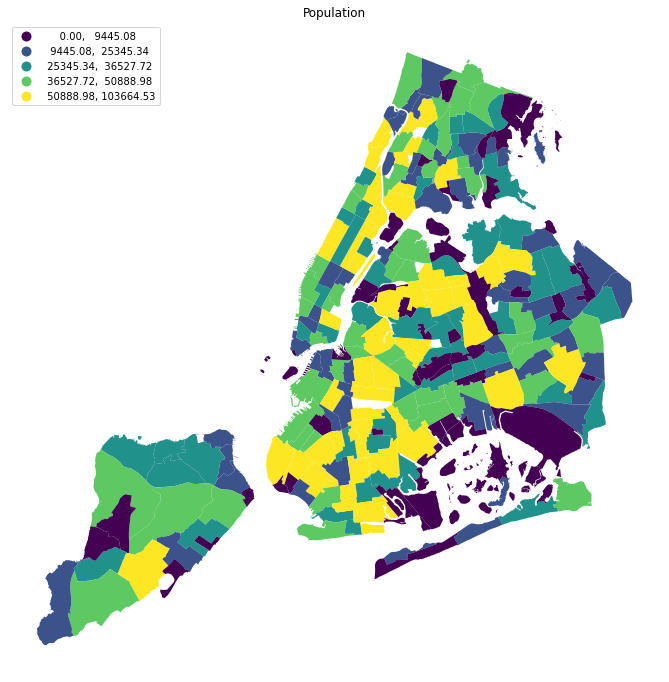

In [17]:
ax = neighborhoods.plot(column='population', scheme='quantiles', legend=True, legend_kwds={'loc': 'upper left'})
ax.axis('off')
ax.set_title('Population');

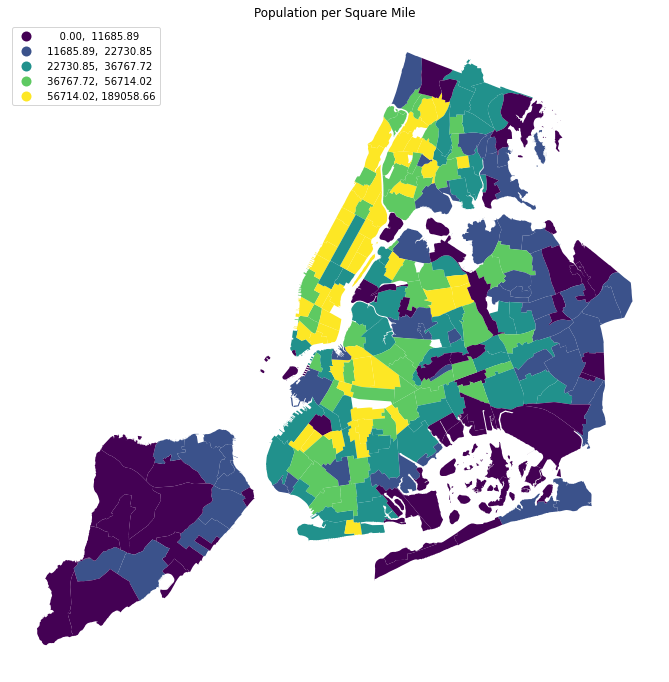

In [18]:
ax = neighborhoods.plot(column='population_per_sq_mile', scheme='quantiles', legend=True, legend_kwds={'loc': 'upper left'})
ax.axis('off')
ax.set_title('Population per Square Mile');

## Raster Data: Daytime Population (LandScan)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
from rasterstats import zonal_stats

In [21]:
url = "./data/LandScan/LandScanConusDay.tif"

In [22]:
neighborhood_daytime_pops = zonal_stats(neighborhoods, url, stats='sum')

In [23]:
neighborhood_daytime_pops[:5]

[{'sum': 32664.0},
 {'sum': 61826.0},
 {'sum': 55073.0},
 {'sum': 55225.0},
 {'sum': 33862.0}]

In [24]:
neighborhoods['daytime_population'] = [i['sum'] for i in neighborhood_daytime_pops]

In [25]:
neighborhoods['daytime_population_per_sq_mile'] = neighborhoods['daytime_population'] / neighborhoods['area_sq_miles']

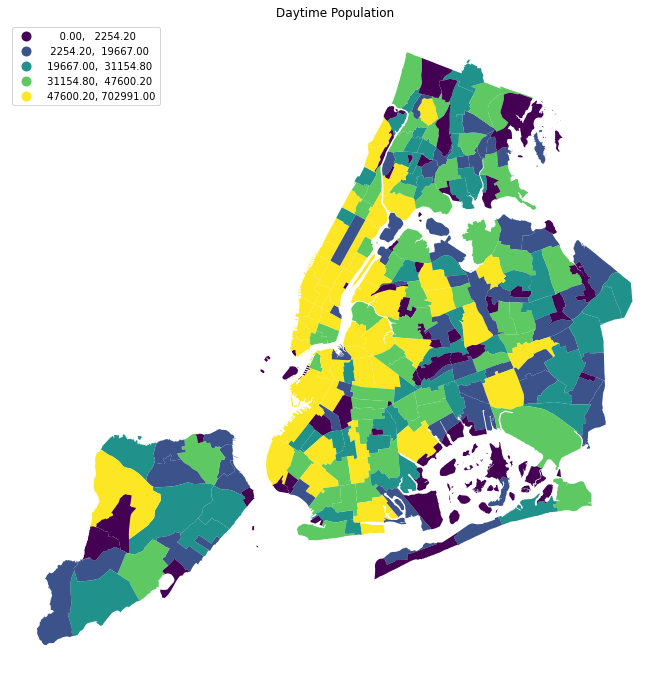

In [26]:
ax = neighborhoods.plot(column='daytime_population', scheme='quantiles', legend=True, legend_kwds={'loc': 'upper left'})
ax.axis('off')
ax.set_title('Daytime Population');

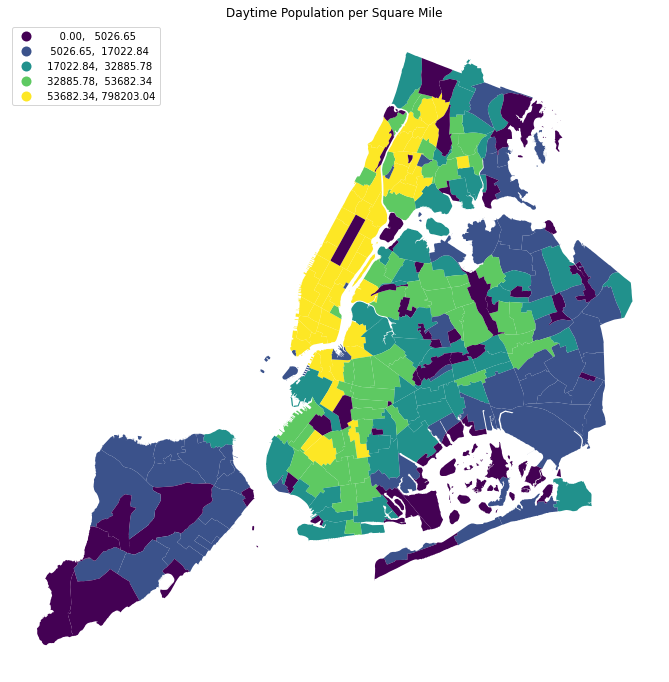

In [27]:
ax = neighborhoods.plot(column='daytime_population_per_sq_mile', scheme='quantiles', legend=True, legend_kwds={'loc': 'upper left'})
ax.axis('off')
ax.set_title('Daytime Population per Square Mile');

## Raster Data: Nighttime Population (LandScan)

In [28]:
url = "./data/LandScan/LandScanConusNight.tif"

In [29]:
neighborhood_nighttime_pops = zonal_stats(neighborhoods, url, stats='sum')

In [30]:
neighborhoods['nighttime_population'] = [i['sum'] for i in neighborhood_nighttime_pops]

In [31]:
neighborhoods['nighttime_population_per_sq_mile'] = neighborhoods['nighttime_population'] / neighborhoods['area_sq_miles']

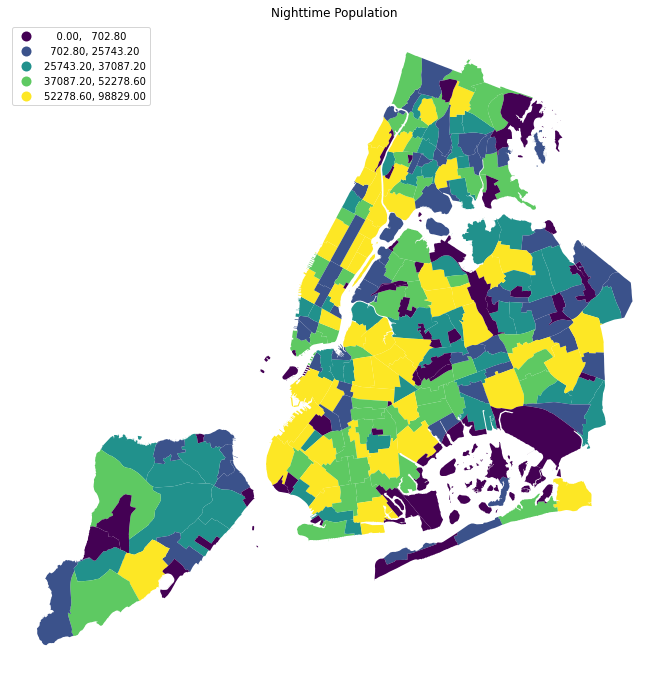

In [32]:
ax = neighborhoods.plot(column='nighttime_population', scheme='quantiles', legend=True, legend_kwds={'loc': 'upper left'})
ax.axis('off')
ax.set_title('Nighttime Population');

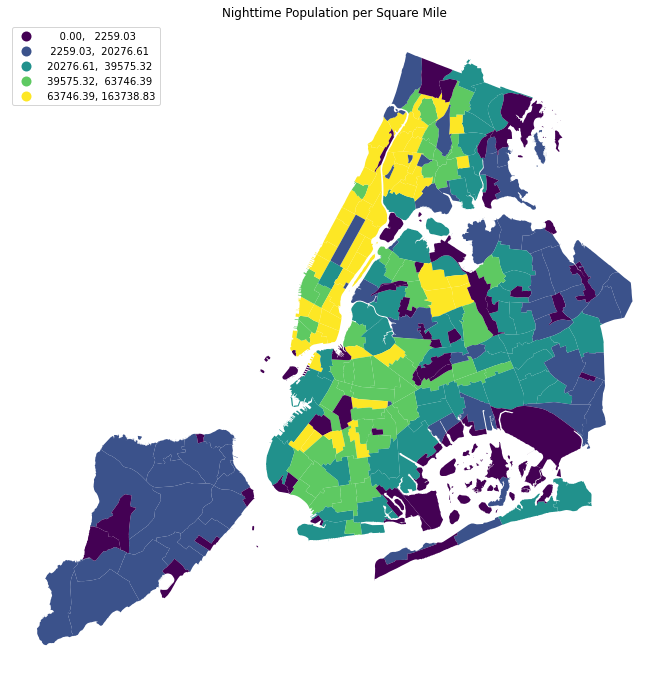

In [33]:
ax = neighborhoods.plot(column='nighttime_population_per_sq_mile', scheme='quantiles', legend=True, legend_kwds={'loc': 'upper left'})
ax.axis('off')
ax.set_title('Nighttime Population per Square Mile');